In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [321]:
!g++ 10Task.cpp -O3 -march=native -ffast-math


In [322]:
!./a.out 1 1 N[0] M[0] L2

1.193969e-02 2.909018e-04


In [323]:
N = [10, 100, 1_000, 10_000]
M = [10, 100, 1_000, 10_000]

In [324]:
Mu = [0.1, 0.01, 0.001]
C = [1, 10, 100]
Norm = ["L2", "W", "C"]

In [325]:
Max = 3 * 3 * 3#27 табличек
cnt = 0

In [326]:
tables = []
description = []
cnt = 0

In [327]:

for norm in Norm:
    for c in C:
        for mu in Mu:
            table1 = pd.DataFrame(index=N, columns=M)
            table2 = pd.DataFrame(index=N, columns=M)
            for n in N:
                for m in M:
                    residual = !./a.out $mu $c $n $m $norm
                    if len(residual) == 0:
                        residual = ["nan", "nan"]
                    else:
                        residual = residual[0].split(" ")
                    table1[n][m] = residual[0]
                    table2[n][m] = residual[1]
                    
                    
            print("Mu=", mu, "  C=", c, " Норма=", norm, " H(Плотность):")
            print(table1)
            print()
            
            print("Mu=", mu, "  C=", c, " Норма=", norm, " V(Скорость):")
            print(table2)
            
            print()
            print(cnt)
            print()
            cnt+=1
            
            tables.append(table1.T)            
            tables.append(table2.T)
            description.append("".join(["Mu=", str(mu), "  C=", str(c), " Норма=", str(norm), " H(Плотность):"]))
            description.append("".join(["Mu=", str(mu), "  C=", str(c), " Норма=", str(norm), " V(Скорость):"]))
        

Mu= 0.1   C= 1  Норма= L2  H(Плотность):
              10            100           1000          10000
10     4.696012e-01  5.273774e-02  2.061029e-02  1.983687e-02
100    4.676729e-01  4.794685e-02  4.822147e-03  5.248298e-04
1000   4.676547e-01  4.793345e-02  4.807590e-03  4.810054e-04
10000  4.676542e-01  4.793332e-02  4.807479e-03  4.808928e-04

Mu= 0.1   C= 1  Норма= L2  V(Скорость):
              10            100           1000          10000
10     4.875196e-02  2.258236e-02  2.216811e-02  2.214678e-02
100    2.988319e-02  8.504889e-04  2.495879e-04  2.309446e-04
1000   2.970035e-02  7.253258e-04  6.949198e-05  7.547881e-06
10000  2.969852e-02  7.243288e-04  6.912976e-05  6.940393e-06

0

Mu= 0.01   C= 1  Норма= L2  H(Плотность):
              10            100           1000          10000
10     4.693622e-01  5.309688e-02  2.166696e-02  2.094877e-02
100    4.680585e-01  4.801370e-02  4.828824e-03  5.282214e-04
1000   6.490445e-01  4.800133e-02  4.814649e-03  4.817075e-04
1000

Mu= 0.1   C= 10  Норма= W  H(Плотность):
              10            100           1000          10000
10     2.624592e-01  5.733031e-03  1.580740e-03  1.391264e-03
100    7.013725e+01  2.636787e-03  2.831354e-05  5.751677e-07
1000   9.782317e+03  2.618552e-03  2.633004e-05  2.651374e-07
10000  1.075803e+03  2.618370e-03  2.631142e-05  2.632600e-07

Mu= 0.1   C= 10  Норма= W  V(Скорость):
              10            100           1000          10000
10     2.954698e-02  8.125097e-03  7.045407e-03  6.944591e-03
100    7.567273e+02  6.724704e-05  2.347605e-06  8.105645e-07
1000   9.951740e+01  5.517104e-05  5.377756e-07  6.437062e-09
10000  5.578455e+01  5.505707e-05  5.265280e-07  5.252027e-09

12

Mu= 0.01   C= 10  Норма= W  H(Плотность):
              10             100           1000          10000
10     2.635583e-01   5.756304e-03  1.585448e-03  1.395191e-03
100    5.803430e+12   2.648648e-03  2.843621e-05  5.774470e-07
1000   2.153164e+10   3.059475e+42  2.644951e-05  2.663354e-07

Mu= 0.1   C= 100  Норма= C  H(Плотность):
              10            100           1000          10000
10     4.454859e-01  1.047789e-01  7.411283e-02  7.107076e-02
100    3.090368e+05  3.566965e-02  4.166086e-03  1.038167e-03
1000   1.236187e+03  4.696436e+57  3.481856e-03  3.541667e-04
10000  1.318832e+03  2.390707e+63  3.475029e-03  3.473407e-04

Mu= 0.1   C= 100  Норма= C  V(Скорость):
              10            100           1000          10000
10     3.669411e-01  3.313374e-02  4.240186e-02  4.516272e-02
100    1.915365e+03  3.324154e-02  2.893953e-03  3.345240e-04
1000   5.901420e+01  4.906579e+03  3.265958e-03  3.223104e-04
10000  9.533754e+02  5.267763e+04  3.269676e-03  3.259984e-04

24

Mu= 0.01   C= 100  Норма= C  H(Плотность):
              10             100           1000          10000
10     4.478214e-01   1.050894e-01  7.427042e-02  7.121407e-02
100    2.812946e+08   3.581924e-02  4.183770e-03  1.042790e-03
1000   1.069842e+09   2.757871e+74  3.496213e-03  3.556245e

In [335]:
with open("my_tables.txt", "w") as f:
    for i in range(len(tables)):
        print(description[i], file=f)
        print("\n", file=f)
        print(tables[i].to_latex(), file=f)
        print("\n", file=f)
        print("\\bigskip", file=f)
        print("\\bigskip", file=f)
        print("\\bigskip", file=f)
        print("\n", file=f)

In [330]:
!./a.out 0.1 1 10 10 L2

4.696012e-01 4.875196e-02


In [331]:
!g++ 10Task_2.cpp -O3 -march=native -ffast-math


In [332]:
def run_prog(M):
    result = !./a.out $M
    
    result[0] = [float(i) for i in result[0].split()]
    result[1] = [float(i) for i in result[1].split()]
    return result

In [416]:
r = run_prog(18170)

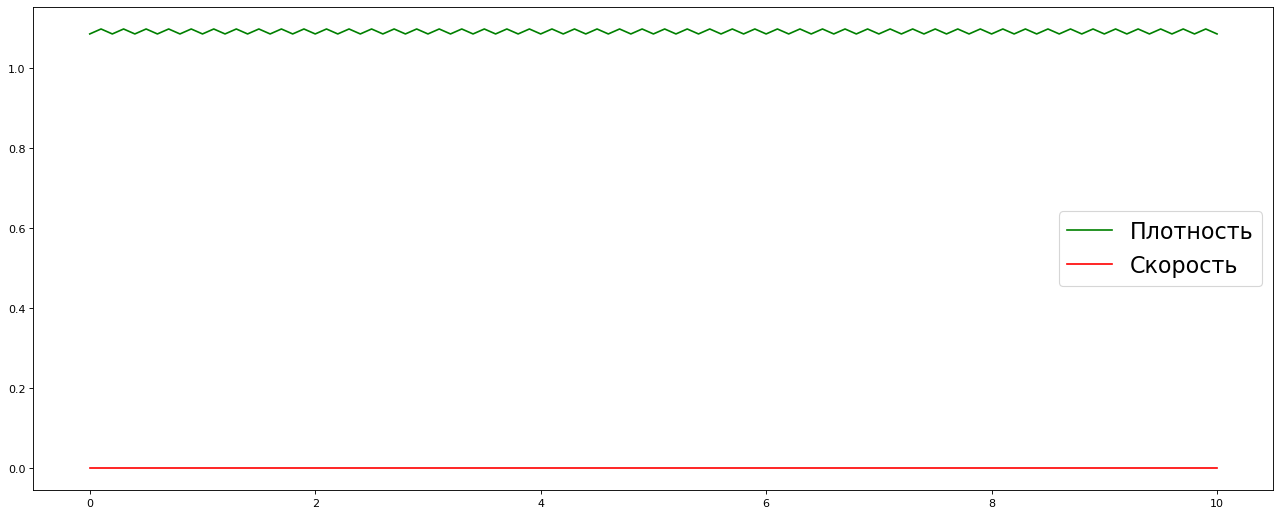

-6.187560e-01


In [418]:
draw(r[0], r[1])
print("{:e}".format(determ_diff_mass(10000)))

In [407]:
print("{:e}".format(determ_diff_mass(500)))

-6.066234e-01


In [462]:
def determ_stabilisation():
    '''Возвращает момент стабилизации и потерянную массу'''
    eps = 0.02
    step = 1800
    previous= -1
    res = run_prog(0)
    initial_mass = np.linalg.norm(res[0])
    while True:
        res = run_prog(step)
        if abs(max(res[0]) - min(res[0])) < eps and abs(max(res[1]) - min(res[1])) < eps:
            return step, np.linalg.norm(res[0]) - initial_mass
        step+=1
        print(step, )
    

In [463]:
def determ_diff_mass(N):
    res = run_prog(0)
    initial_mass = np.linalg.norm(res[0])
    res = run_prog(N)
    return np.linalg.norm(res[0]) - initial_mass

In [464]:
determ_stabilisation()

1801 1.184300e-02
1802 9.204200e-03
1803 8.144800e-03
1804 8.145900e-03
1805 8.156200e-03
1806 1.013490e-02
1807 1.278970e-02
1808 1.542190e-02
1809 1.802310e-02
1810 2.059040e-02
1811 2.311380e-02
1812 2.558440e-02
1813 2.799620e-02
1814 3.034850e-02
1815 3.263020e-02
1816 3.483620e-02
1817 3.696770e-02
1818 3.901850e-02
1819 4.098350e-02
1820 4.286670e-02
1821 4.466230e-02
1822 4.636850e-02
1823 4.799170e-02
1824 4.952500e-02
1825 5.097520e-02
1826 5.234010e-02
1827 5.362340e-02
1828 5.482480e-02
1829 5.595240e-02
1830 5.700390e-02
1831 5.798430e-02
1832 5.891320e-02
1833 5.977710e-02
1834 6.057330e-02
1835 6.130550e-02
1836 6.197630e-02
1837 6.258840e-02
1838 6.314430e-02
1839 6.364670e-02
1840 6.409810e-02
1841 6.449990e-02
1842 6.485580e-02
1843 6.516710e-02
1844 6.543630e-02
1845 6.566370e-02
1846 6.585270e-02
1847 6.600360e-02
1848 6.611850e-02
1849 6.619780e-02
1850 6.624350e-02
1851 6.625480e-02
1852 6.623380e-02
1853 6.618030e-02
1854 6.609550e-02
1855 6.597800e-02
1856 6.582

2257 5.443890e-02
2258 5.425310e-02
2259 5.403320e-02
2260 5.377890e-02
2261 5.349080e-02
2262 5.316820e-02
2263 5.281080e-02
2264 5.241820e-02
2265 5.198980e-02
2266 5.152510e-02
2267 5.102350e-02
2268 5.048440e-02
2269 4.990730e-02
2270 4.929120e-02
2271 4.863570e-02
2272 4.793980e-02
2273 4.720290e-02
2274 4.642450e-02
2275 4.560360e-02
2276 4.473960e-02
2277 4.383210e-02
2278 4.288010e-02
2279 4.188350e-02
2280 4.085250e-02
2281 3.979350e-02
2282 3.869710e-02
2283 3.756220e-02
2284 3.638830e-02
2285 3.517490e-02
2286 3.392350e-02
2287 3.263450e-02
2288 3.130730e-02
2289 2.994230e-02
2290 2.854160e-02
2291 2.711030e-02
2292 2.564640e-02
2293 2.415230e-02
2294 2.263150e-02
2295 2.109210e-02
2296 1.953470e-02
2297 1.796460e-02
2298 1.638860e-02
2299 1.481460e-02
2300 1.325310e-02
2301 1.172460e-02
2302 1.024520e-02
2303 8.863000e-03
2304 7.666000e-03
2305 7.932900e-03
2306 9.413500e-03
2307 1.098960e-02
2308 1.260650e-02
2309 1.424000e-02
2310 1.587980e-02
2311 1.751670e-02
2312 1.914

2713 1.678170e-02
2714 1.802680e-02
2715 1.926320e-02
2716 2.048640e-02
2717 2.169400e-02
2718 2.288350e-02
2719 2.405370e-02
2720 2.521210e-02
2721 2.635120e-02
2722 2.745800e-02
2723 2.853130e-02
2724 2.957040e-02
2725 3.057430e-02
2726 3.154250e-02
2727 3.247420e-02
2728 3.336920e-02
2729 3.422700e-02
2730 3.504740e-02
2731 3.583010e-02
2732 3.657510e-02
2733 3.728240e-02
2734 3.795220e-02
2735 3.858430e-02
2736 3.917960e-02
2737 3.973680e-02
2738 4.025750e-02
2739 4.074240e-02
2740 4.119110e-02
2741 4.160320e-02
2742 4.198030e-02
2743 4.232200e-02
2744 4.262890e-02
2745 4.290160e-02
2746 4.314060e-02
2747 4.334640e-02
2748 4.351860e-02
2749 4.365760e-02
2750 4.376400e-02
2751 4.383820e-02
2752 4.388070e-02
2753 4.389100e-02
2754 4.386970e-02
2755 4.381700e-02
2756 4.373300e-02
2757 4.361790e-02
2758 4.347160e-02
2759 4.329430e-02
2760 4.308610e-02
2761 4.284680e-02
2762 4.257660e-02
2763 4.227540e-02
2764 4.194310e-02
2765 4.157970e-02
2766 4.118500e-02
2767 4.075880e-02
2768 4.030

(2791, -0.24172106876620525)

In [283]:
r = run_prog(1817)

In [309]:
def draw(first, second):
    plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

    plt.plot([0.1*i for i in range(len(first))], first, "g")
    plt.plot([0.1*i for i in range(len(second))], second, "r")
    plt.legend(["Плотность", "Скорость"], prop={"size":20})
    plt.show()

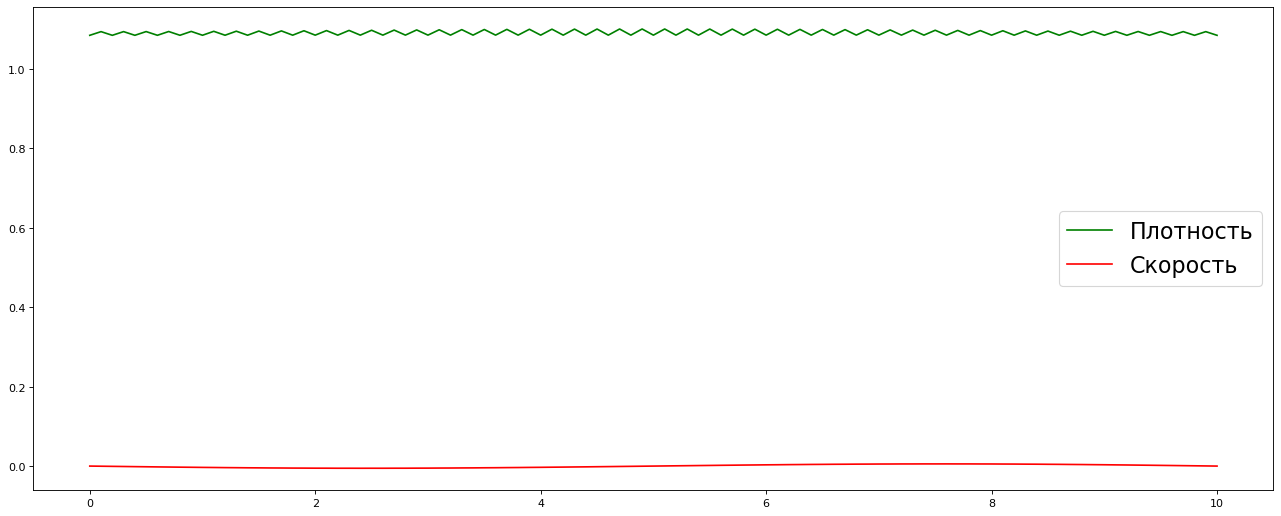

In [310]:
draw(r[0], r[1])

In [419]:
!code 10Task_3.cpp

In [439]:
!g++ 10Task_3.cpp -O3 -march=native -ffast-math


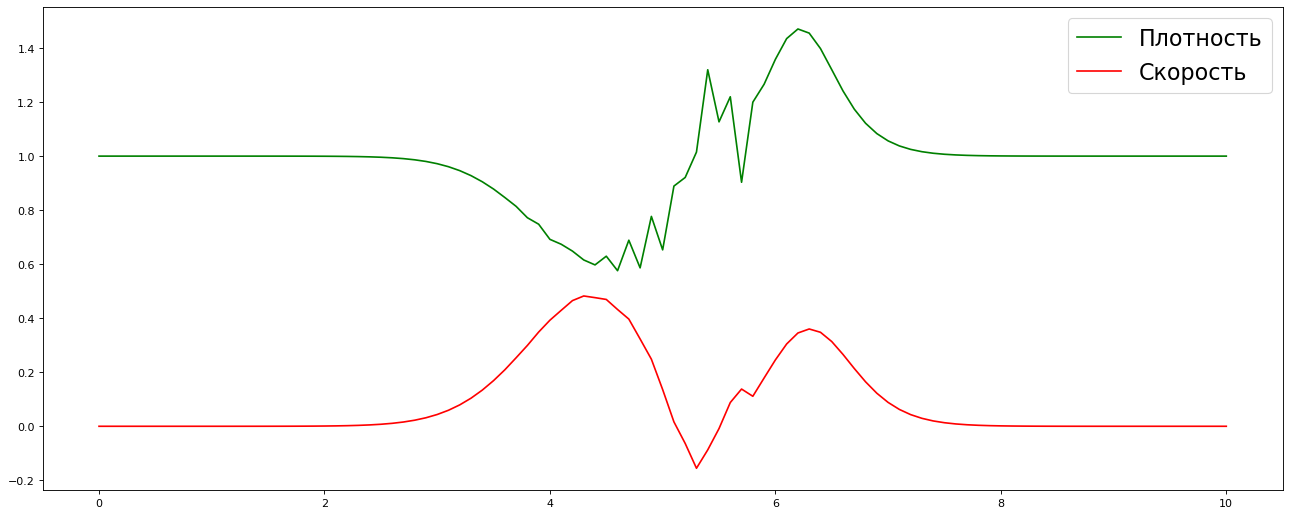

4.397324e-02


In [460]:
step = 10
r = run_prog(step)
draw(r[0], r[1])
print("{:e}".format(determ_diff_mass(step)))